<a href="https://colab.research.google.com/github/Madhesh-V/NASA-SPoRT-LIS/blob/main/SPoRT_LIS_Drought_Session3_Madhesh_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

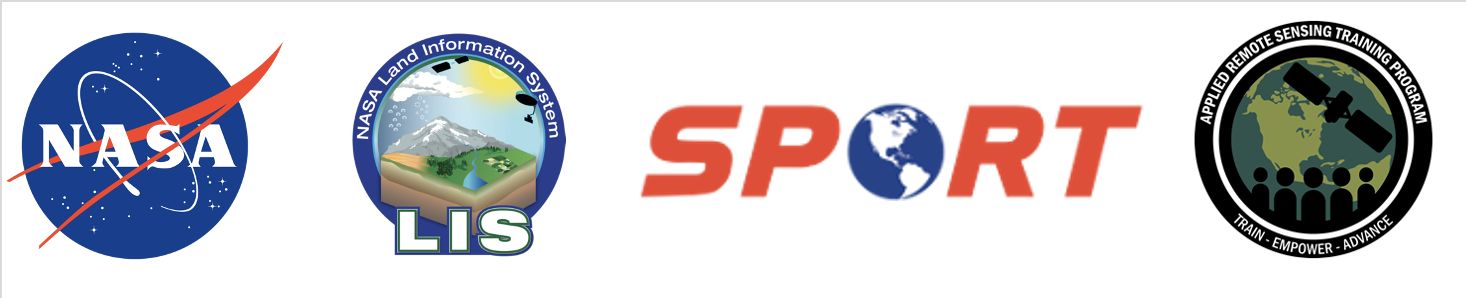

# **Application of NASA SPoRT-Land Information System (SPoRT-LIS) Soil Moisture Data for Drought: My Homework Project**

**Pre-Exercise Set-Up**

In [1]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy rioxarray
!apt-get -qq install python3-cartopy

!pip uninstall -y shapely    
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 0s (2,052 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Buildi

**Required Imports and Colorscale Function**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from datetime import datetime as dt

import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [4]:
def get_LIS_cmap(output:str, file_str:str) -> ListedColormap:
  """ Make custom cmap, levels, and labels for LIS product
  
  Parameters
  ----------
  :param output: string defining the output product cmap
  :param file_str: string of input file to get labels

  Returns
  -------
  :returns: custom LIS cmap
  :returns: custom levels
  :returns: title string for plot
  
  """

  cdict = {'rsm': np.array(([0.549, 0.3922, 0.3529],
                           [0.7059, 0.549, 0.5098],
                           [0.8824, 0.7451, 0.7059],
                           [0.6471, 0.0, 0.0],
                           [0.8824, 0.0784, 0.0],
                           [1.0, 0.1961, 0.0],
                           [1.0, 0.3765, 0.0],
                           [1.0, 0.6275, 0.0],
                           [1.0, 0.7529, 0.2353],
                           [1.0, 0.9098, 0.4706],
                           [0.5882, 0.9608, 0.549],
                           [0.3137, 0.9412, 0.3137],
                           [0.1176, 0.7059, 0.1176],
                           [0.0784, 0.3922, 0.8235],
                           [0.1569, 0.5098, 0.9412],
                           [0.3137, 0.6471, 0.9608],
                           [0.5882, 0.8235, 0.9804],
                           [0.6275, 0.549, 1.0],
                           [0.4392, 0.3765, 0.8627],
                           [0.2353, 0.1569, 0.7059])),
           'vsm': np.array(([0.7059, 0.549, 0.5098],
                           [0.902, 0.4392, 0.4392],
                           [0.6471, 0.0, 0.0],
                           [0.7529, 0.0, 0.0],
                           [0.8824, 0.0784, 0.0],
                           [1.0, 0.1961, 0.0],
                           [1.0, 0.3765, 0.0],
                           [1.0, 0.6275, 0.0],
                           [1.0, 0.7529, 0.2353],
                           [1.0, 0.9098, 0.4706],
                           [0.5882, 0.9608, 0.549],
                           [0.3137, 0.9412, 0.3137],
                           [0.1176, 0.7059, 0.1176],
                           [0.1176, 0.4314, 0.9216],
                           [0.2353, 0.5882, 0.9608],
                           [0.4706, 0.7255, 0.9804])),
           'gvf': np.array(([0.4706, 0.3137, 0.2745],
                           [0.6275, 0.4706, 0.4314],
                           [0.7843, 0.6275, 0.5882],
                           [1.0, 0.9098, 0.4706],
                           [0.6275, 0.902, 0.1961],
                           [0.7059, 0.9804, 0.6667],
                           [0.4706, 0.9608, 0.451],
                           [0.2157, 0.8235, 0.2353],
                           [0.1176, 0.7059, 0.1176],
                           [0.0588, 0.6275, 0.0588])),
           'chg': np.array(([0.3922, 0.2353, 0.1961],
                           [0.549, 0.3922, 0.3529],
                           [0.7059, 0.549, 0.5098],
                           [0.8824, 0.7451, 0.7059],
                           [0.9725, 0.6275, 0.6275],
                           [0.6471, 0.0, 0.0],
                           [0.8824, 0.0784, 0.0],
                           [1.0, 0.3765, 0.0],
                           [1.0, 0.7529, 0.2353],
                           [1.0, 0.9804, 0.6667],
                           [0.7059, 0.7059, 0.7059],
                           [0.5882, 0.9608, 0.549],
                           [0.3137, 0.9412, 0.3137],
                           [0.1176, 0.7059, 0.1176],
                           [0.1176, 0.4314, 0.9216],
                           [0.2353, 0.5882, 0.9608],
                           [0.4706, 0.7255, 0.9804],
                           [0.7059, 0.9412, 0.9804],
                           [0.502, 0.4392, 0.9216],
                           [0.2824, 0.2353, 0.7843],
                           [0.1765, 0.1176, 0.6471])),
           'per': np.array(([0.4196,0.0000,0.0000],
                            [0.9216,0.0000,0.0000],
                            [0.9216,0.4588,0.0000],
                            [1.0000,0.7020,0.4000],
                            [1.0000,1.0000,0.4000],
                            [0.7843,0.7843,0.7843],
                            [0.8863,1.0000,1.0000],
                            [0.5961,0.8235,0.9765],
                            [0.3294,0.6510,0.9529],
                            [0.1882,0.5137,0.9294],
                            [29/255.,101/255.,207/255.]))
           }
  level_dict = {'rsm': np.arange(5,96,5),
                'vsm': np.arange(3,46,3),
                'gvf': np.array([10,20,30,40,50,60,70,80,90.]),
                'chg': np.array([-32, -28, -24, -20, -16, -12, -8, -4, -2, -0.1,
                                 0.1, 2, 4, 8, 12, 16, 20, 24, 28, 32]),
                'per': np.array([2,5,10,20,30,70,80,90,95,98])}


  _date = dt.strptime(file_str.split('/')[-1][:8],'%Y%m%d')
  _hour = dt.strptime(file_str.split('/')[-1][9:13],'%H%M')
  _product = file_str.split('/')[-2]
  _ptype = file_str.split('/')[-1].split('_')[4]


  title_dict = {'rsm': f'{_product} (available water; %) valid {_hour:%H}Z'
                       f'{_date:%m-%d-%Y}',
                'vsm': f'{_product} (%) valid {_hour:%H}Z {_date:%m-%d-%Y}',
                'gvf': f'Green Vegetation Fraction (%) valid {_date:%m-%d-%Y}',
                'chg': f'{" ".join(_product.split("_"))} Difference (%) valid '
                       f'{_hour:%H}Z {_date:%m-%d-%Y}',
                'per': f'Soil Moisure Percentile valid {_date:%m-%d-%Y}'}
  
 
  _cmap = ListedColormap(cdict[output][1:-1])
  _cmap.set_bad(color=(1,1,1))
  _cmap.set_over(color=cdict[output][-1])
  _cmap.set_under(color=cdict[output][0])

  return _cmap, level_dict[output], title_dict[output]

# **Exercise 1: Readin NASA SPoRT LIS data and plot for CONUS, then create 4-panel zoomed-in plot**

**Drought Monitor Example - CONUS - 16-18 May 2023**

In [15]:
geo_url = 'https://github.com/NASAARSET/SPoRT-LIS/raw/main/sample_data/conus/vsm_percentiles/'

# Gridded Soil Moisure (VSM) 0-100cm percentile
file_in = geo_url + '20220930_0000_sport_lis_vsm0-100cm_percentile_conus3km_float_wgs84.tif'
ptype = 'per'

ds = rxr.open_rasterio(file_in) if ptype != 'vsm' else rxr.open_rasterio(file_in) * 100.
# Mask any nodata values
ds = ds.where(ds < 9999).copy()

Text(0.5, 1.0, 'Soil Moisure Percentile valid 09-30-2022')

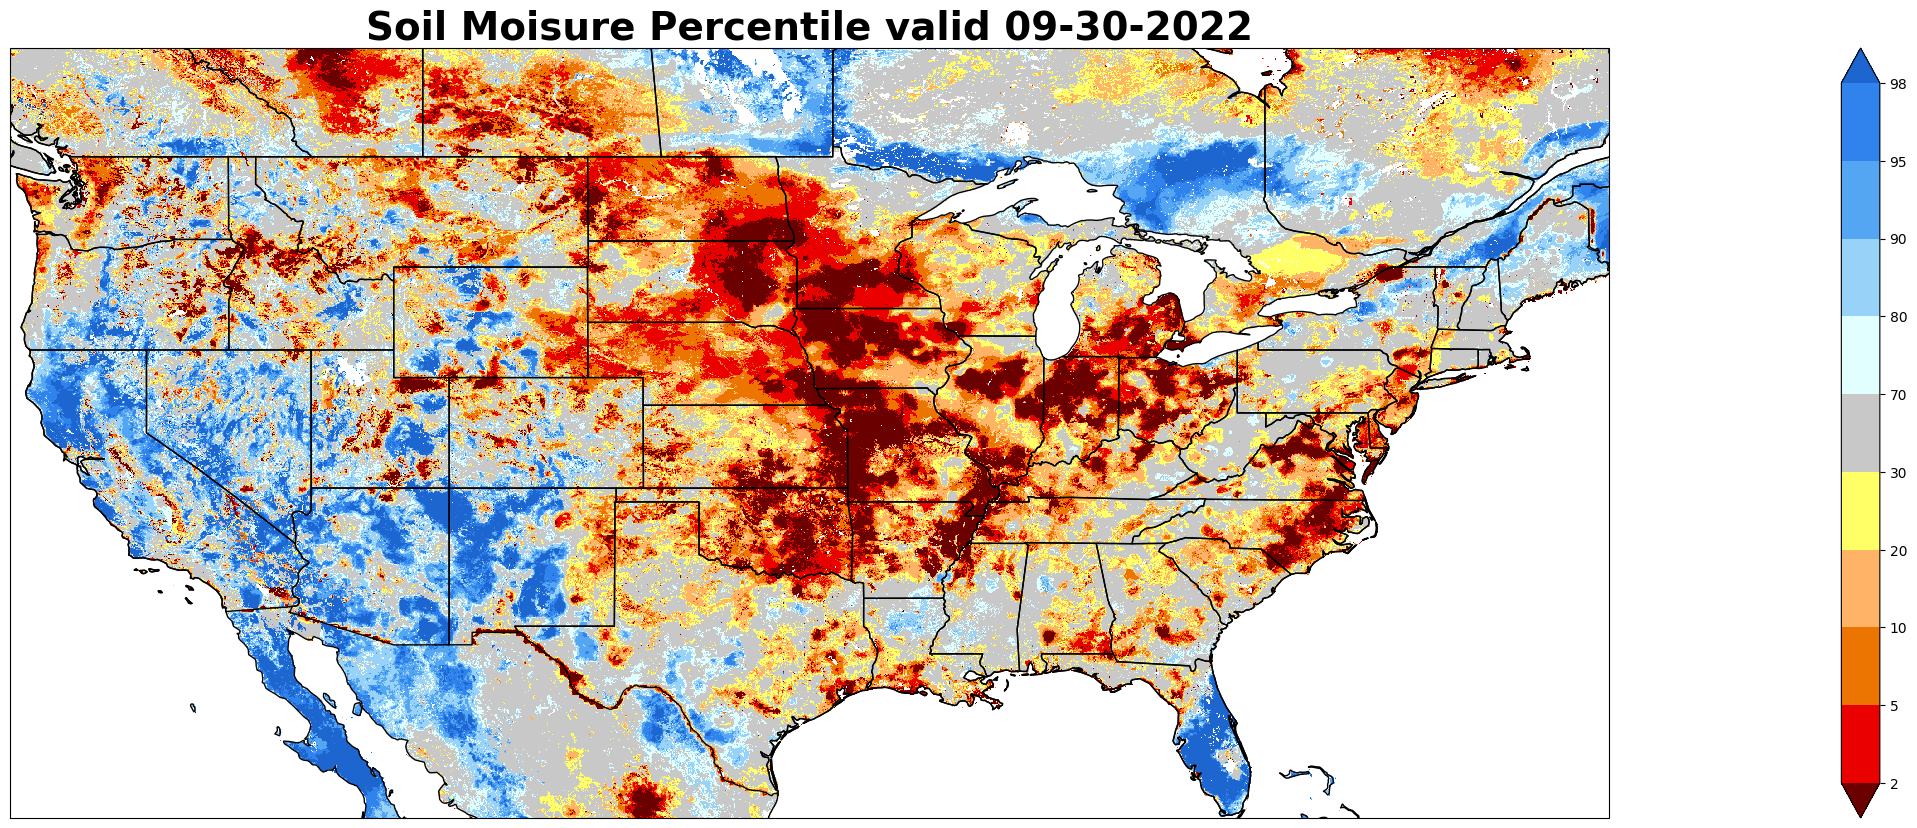

In [20]:
cmap_LIS, levels, tlabel = get_LIS_cmap(ptype, file_in)
fig, ax = plt.subplots(figsize=(60,10),subplot_kw={'projection':ccrs.PlateCarree()})
map = ds.squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap_LIS,
                        # vmin=10, vmax=90,
                        norm= BoundaryNorm(levels, cmap_LIS.N),
                        extend='both',
                        cbar_kwargs={'ticks': levels})
ax.coastlines()
ax.add_feature(cf.STATES)
ax.set_title(label=tlabel, fontdict={'fontsize': 28,'fontweight': 'bold'})

# **Exercise 2: Readin NASA SPoRT LIS data and plot for Africa, then create a soil moisture anomaly zoomed in plot**

In [37]:

geo_url = 'https://github.com/NASAARSET/SPoRT-LIS/raw/main/sample_data/africa/'

# RSM 10-40cm
file_in = geo_url + 'rsm10-40cm/20211101_0000_sport_lis_rsm10-40cm_allafrica_3km_float_wgs84.tif'
ptype = 'rsm'


ds = rxr.open_rasterio(file_in) if ptype != 'vsm' else rxr.open_rasterio(file_in) * 100.
# Mask any nodata values
ds = ds.where(ds < 9999).copy()
     

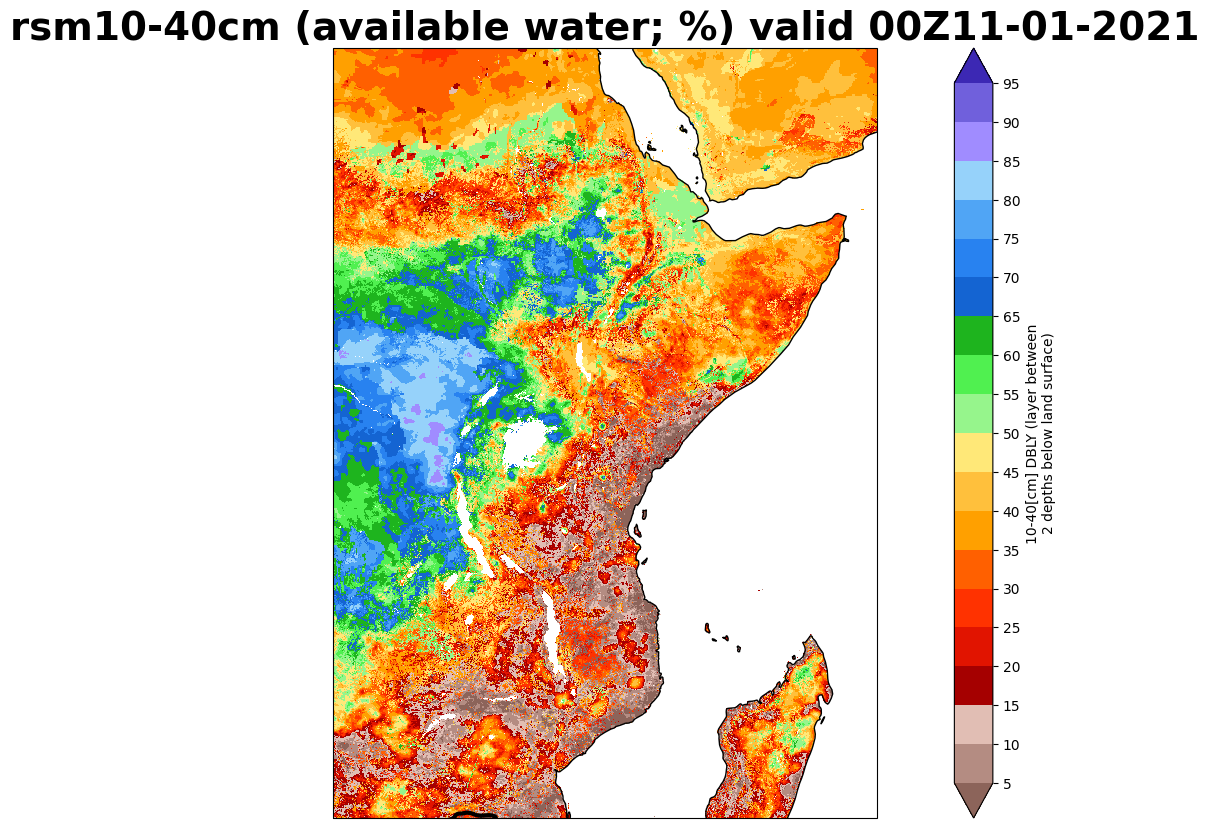

In [40]:
cmap_LIS, levels, tlabel = get_LIS_cmap(ptype, file_in)
fig, ax = plt.subplots(figsize=(20,10),subplot_kw={'projection':ccrs.PlateCarree()})
map = ds.squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap_LIS,
                        # vmin=10, vmax=90,
                        norm= BoundaryNorm(levels, cmap_LIS.N),
                        extend='both',
                        cbar_kwargs={'ticks': levels})

ax.coastlines()
ax.add_feature(cf.STATES, linewidth=3)
ax.set_title(label=tlabel, fontdict={'fontsize': 28,'fontweight': 'bold'})

#set custom bounds for plot
ax.set_extent([22,53,-22,21])